In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

df = pd.read_csv('colchange3.csv')

In [2]:
print(df.isnull().values.any())

False


In [3]:
print(df)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0      259000  21    0      4          1     9     0     0     0     0    0   
1      259000  21    0      4          1     9     0     0     0     0    1   
2      259000  21    0      4          1     9     0     0     0     0    2   
3      259000  21    0      4          1     9     0     0     0     0    3   
4      259000  21    0      4          1     9     0     0     0     0    4   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43948  209000  28    0     10          1     9     0     0     0     0   88   
43949  209000  28    0     10          1     9     0     0     0     0   89   
43950  209000  28    0     10          1     9     0     0     0     0   90   
43951  209000  28    0     10          1     9     0     0     0     0   91   
43952  209000  28    0     10          1     9     0     0     0     0   92   

       nike  jordan  newbalance  adidas  converse  

In [4]:
data= df[(df['day'] == 0)]

In [5]:
print(data)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0      259000  21    0      4          1     9     0     0     0     0    0   
92     149000  24    0      9          1     9     0     0     0     0    0   
184    139000  17    0      5          2     9     1     0     0     0    0   
277    149000  24    0      2          1     9     0     0     0     0    0   
367     99000  18    0      1          1     9     0     0     0     0    0   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43492  284400  25    0     12          1     6     0     0     0     0    0   
43583  600000  26    0      9          2     1     1     0     0     0    0   
43675  309000  25    0      4          1     4     0     0     0     0    0   
43767  289000  25    0     10          1     9     0     0     0     0    0   
43860  209000  28    0     10          1     9     0     0     0     0    0   

       nike  jordan  newbalance  adidas  converse  

In [6]:
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
print(data)

        발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0    189000  28    0     11          3     2     1     8     0     0    0   
1    279000  19    0      7          3     9     1     1     0     0    0   
2    119000   5    0      1          4    10     4    10     2     0    0   
3    119000  29    0     10          2     1    10     0     0     0    0   
4    119000   5    0      6          4     4     3     9     2     0    0   
..      ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
472   99000  25    0      5          1     4     0     0     0     0    0   
473  136000  29    1      3          3     1    10     8     0     0    0   
474  309000  25    0      1          1     6     0     0     0     0    0   
475  129000  29    0      1          3     1     1     9     0     0    0   
476  129000   1    0     12          3     1     4     6     0     0    0   

     nike  jordan  newbalance  adidas  converse  콜라보유무  type  
0       0   

In [8]:
print(data.isnull().values.any())

False


In [9]:
print(data.groupby('type').size().reset_index(name = 'count'))

   type  count
0     0    100
1     1    377


In [10]:
y = data["type"]

In [11]:
print(y)

0      1
1      1
2      0
3      1
4      0
      ..
472    1
473    1
474    1
475    1
476    1
Name: type, Length: 477, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler
X = data[['콜라보유무', 'converse', 'jordan', 'nike', '라인', '콜라보', 'col3', 'col5', 'color_num', 'adidas', 'newbalance', 'col1', 'col2', 'col4', '발매가', 'month' ]]
scaler = StandardScaler()
scaler.fit(X)
scale_X = scaler.fit_transform(X)
scale_X  = np.asarray(X).astype(np.int64)
print(scale_X)

[[     1      1      0 ...      0 189000     11]
 [     0      0      0 ...      0 279000      7]
 [     0      0      0 ...      2 119000      1]
 ...
 [     0      0      0 ...      0 309000      1]
 [     0      0      0 ...      0 129000      1]
 [     0      0      0 ...      0 129000     12]]


In [13]:
print(scale_X)

[[     1      1      0 ...      0 189000     11]
 [     0      0      0 ...      0 279000      7]
 [     0      0      0 ...      2 119000      1]
 ...
 [     0      0      0 ...      0 309000      1]
 [     0      0      0 ...      0 129000      1]
 [     0      0      0 ...      0 129000     12]]


In [14]:
train_x, test_x, y_train, y_test = train_test_split(scale_X, y, test_size = 0.3, random_state = 1)

In [15]:
print(y_train)

39     1
341    1
314    1
192    1
164    1
      ..
255    1
72     1
396    1
235    1
37     1
Name: type, Length: 333, dtype: int64


In [16]:
train__y = list(y_train)

In [17]:
train_y = np.empty((len(y_train),2))

In [18]:
print(train__y)
print(type(train__y[0]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
for i in range(len(train__y)):
    if train__y[i] == 0:
        train_y[i] = [1, 0]
    elif train__y[i] == 1:
        train_y[i] = [0, 1]
    else:
        train_y[i] = [0, 1]

In [20]:
print(train_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [21]:
test__y = list(y_test)

In [22]:
test_y = np.empty((len(y_test),2))

In [23]:
for i in range(len(test__y)):
    if test__y[i] == 0:
        test_y[i] = [1, 0]
    elif test__y[i] == 1:
        test_y[i] = [0, 1]
    else:
        test_y[i] = [0, 1]

In [24]:
model = tf.keras.Sequential()  
model.add(layers.Dense(16, input_shape=(16,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(18))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(2))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss= 'binary_crossentropy', 
    optimizer="adam",   
    metrics=['accuracy'])  

In [25]:
hist = model.fit(
    train_x, train_y,
    batch_size = 10,  
    epochs = 200,      
    validation_split = 0.2,
    shuffle = False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 30)],
    verbose=1)  

# 테스트 데이터로 성능평가
score = model.evaluate(test_x, test_y)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/200
27/27 [==============================] - 0s 11ms/step - loss: 11.9929 - accuracy: 0.2180 - val_loss: 12.1323 - val_accuracy: 0.2090
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 11.9353 - accuracy: 0.2218 - val_loss: 12.1323 - val_accuracy: 0.2090
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 11.9929 - accuracy: 0.2180 - val_loss: 12.1323 - val_accuracy: 0.2090
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 11.9929 - accuracy: 0.2180 - val_loss: 12.1323 - val_accuracy: 0.2090
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 11.9353 - accuracy: 0.2218 - val_loss: 12.1323 - val_accuracy: 0.2090
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 12.1082 - accuracy: 0.2105 - val_loss: 12.1323 - val_accuracy: 0.2090
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 12.1659 - accuracy: 0.2068 - val_loss: 12.1323 - val_accuracy: 0.209

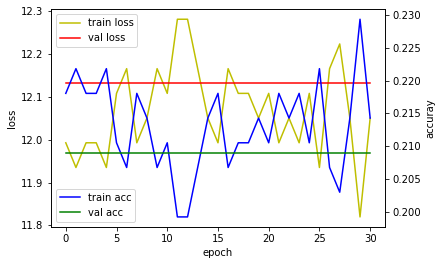

In [26]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                306       
_________________________________________________________________
activation_1 (Activation)    (None, 18)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                6

In [27]:
y_pred = model.predict(test_x)

In [1358]:
print(y_pred)

[[0.24828131 0.7517187 ]
 [0.55255365 0.44744638]
 [0.24379997 0.75619996]
 [0.34647906 0.65352094]
 [0.4165109  0.5834891 ]
 [0.34647906 0.65352094]
 [0.297529   0.702471  ]
 [0.24828131 0.7517187 ]
 [0.56143594 0.43856406]
 [0.27665478 0.7233452 ]
 [0.27267632 0.72732365]
 [0.27267632 0.72732365]
 [0.35132927 0.6486707 ]
 [0.24828131 0.7517187 ]
 [0.297529   0.702471  ]
 [0.4114963  0.58850366]
 [0.29499957 0.7050004 ]
 [0.3494419  0.6505582 ]
 [0.34647906 0.65352094]
 [0.35288072 0.6471192 ]
 [0.23737773 0.7626223 ]
 [0.28363264 0.7163674 ]
 [0.21214607 0.78785396]
 [0.4888214  0.51117855]
 [0.21144003 0.78856   ]
 [0.4824923  0.5175077 ]
 [0.42370042 0.5762996 ]
 [0.24828131 0.7517187 ]
 [0.4262726  0.57372737]
 [0.20552774 0.7944723 ]
 [0.40726298 0.592737  ]
 [0.297529   0.702471  ]
 [0.3564177  0.64358234]
 [0.35889453 0.6411055 ]
 [0.24828131 0.7517187 ]
 [0.31643438 0.6835656 ]
 [0.24828131 0.7517187 ]
 [0.28622457 0.7137754 ]
 [0.4543518  0.5456482 ]
 [0.49670374 0.50329626]


In [1359]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1360]:
print(test__y)

[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]


In [1361]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
precision = precision_score(test__y, y_class, average = 'weighted')
print(precision)

0.8124493106244931


In [1362]:
recall = recall_score(test__y, y_class, average ='weighted')
print(recall)

0.7430555555555556


In [1363]:
print(y_class)

[1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [1364]:
print(f1_score(test__y, y_class, average= 'weighted'))

0.6699070626844268


In [1365]:
confusion_matrix(test__y, y_class)

array([[  7,  37],
       [  0, 100]], dtype=int64)